In [ ]:
!pip install -U gensim

In [ ]:
!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz

In [2]:
import pandas as pd
import re
from pandas import *
import matplotlib.pyplot as plt

#word clouds
import heapq
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import collections
import matplotlib.cm as cm
from matplotlib import rcParams
from tqdm import tqdm

#text preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer as wnl 
#nltk.download('stopwords')
#nltk.download('wordnet')

#hide warning
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

#Topic Modeling
import spacy; spacy.load('en')
import pprint

In [3]:
#word clouds
import heapq
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import collections
import matplotlib.cm as cm
from matplotlib import rcParams
from tqdm import tqdm

## DataFrame Processing

In [9]:
airbnb_train_x=pd.read_csv("airbnb_train_x.csv")
airbnb_train_y=pd.read_csv('airbnb_train_y.csv')
airbnb_test_x=pd.read_csv("airbnb_test_x_modified.csv")
airbnb_raw_test=pd.read_csv('airbnb_test_x.csv')

In [8]:
airbnb_raw_test

,Unnamed: 0,access,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,...,security_deposit,smart_location,space,square_feet,state,street,summary,transit,weekly_price,zipcode
0,1,Full access to driveway and backyard. Baseme...,6,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",5,171,22.0,46,1.0,Real Bed,...,$500.00,"Staten Island , NY","3 bedrooms. big spacious rooms, nice interior,...",NaN,NY,"Staten Island , NY, United States",- House for rent upstairs & off limits downsta...,Walking distance to transportation accessible ...,"$1,200.00",10305.0
1,2,NaN,2,"{Wifi,""Air conditioning"",Kitchen,""Free parking...",0,0,0.0,0,2.0,Real Bed,...,NaN,"Brooklyn, NY",NaN,NaN,NY,"Brooklyn, NY, United States",Blocks away from Broadway Ave/ the JMZ subway ...,NaN,NaN,11221.0
2,3,NaN,2,"{Internet,Wifi,Kitchen,Doorman,Elevator,""Buzze...",6,265,14.0,14,2.0,Real Bed,...,$700.00,"New York, NY",The apartment is on the 11th floor of a 24-hou...,NaN,NY,"New York, NY, United States","Our bright & sunny 2-bedroom, 2-bath apartment...",The apartment is conveniently located within b...,NaN,10024.0
3,4,You can use our kitchen and we also have a was...,2,"{Internet,""Wireless Internet"",""Air conditionin...",6,8,6.0,8,1.0,Real Bed,...,$100.00,"Los Angeles, CA","This is a big modern appartment, bedrooms are ...",NaN,CA,"Los Angeles, CA 90025, United States",We have a great place in a nice neighborhood i...,Yes you can get on the big blue bus or the ora...,NaN,90025.0
4,5,' Own private parking space on driveway or gar...,2,"{TV,Internet,""Wireless Internet"",""Air conditio...",6,106,16.0,16,1.0,Real Bed,...,NaN,"Rosemead, CA",2 rooms Available : Monthly booking suggest 31...,NaN,CA,"Rosemead, CA 91770, United States",50% off for monthly discount Room (A) 40% ...,',NaN,91770.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12203,12204,"Entire 2 bed 1 bath house, porch, rear patio, ...",7,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",10,306,18.0,42,1.0,Real Bed,...,$300.00,"New Orleans, LA","This house is perfect for a family, 3 couples,...",NaN,LA,"New Orleans, LA, United States",Great spot to enjoy all New Orleans has to off...,"Street car, buses, taxicabs, UBER. Very easy ...","$1,285.00",70130.0
12204,12205,"This charming village offers shops, restaurant...",3,"{TV,Internet,""Wireless Internet"",""Air conditio...",30,333,60.0,90,1.0,Real Bed,...,$100.00,"Los Angeles, CA",Your own private bedroom in big (12 ft x 12 ft...,NaN,CA,"Mid-Wilshire, Los Angeles, CA 90004, United St...","Clean, comfortable private bedroom in a 3 bedr...",Centrally located. 2 minute walk to all MTA bu...,NaN,90004.0
12205,12206,The whole apartment except for my bedroom. Wi...,1,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",21,240,51.0,81,1.0,Real Bed,...,NaN,"Los Angeles, CA",I have a proclivity to Radiohead artwork and m...,NaN,CA,"Echo Park, Los Angeles, CA 90026, United States","10 min walking distance to music venues, resta...",Plenty of free available parking on the street...,NaN,90026.0
12206,12207,NaN,4,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",3,335,30.0,60,1.0,Real Bed,...,$500.00,"San Diego, CA",NaN,NaN,CA,"Cape May Avenue, San Diego, CA 92107, United S...","Short walk to the beach in a quiet, peaceful n...",NaN,NaN,92107.0


In [10]:
airbnb_test_x

,Unnamed: 0,access,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,...,security_deposit,smart_location,space,square_feet,state,street,summary,transit,weekly_price,zipcode
0,1,Full access to driveway and backyard. Baseme...,6.0,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",5.0,171.0,22.0,46.0,1.0,Real Bed,...,$500.00,"Staten Island , NY","3 bedrooms. big spacious rooms, nice interior,...",NaN,NY,"Staten Island , NY, United States",- House for rent upstairs & off limits downsta...,Walking distance to transportation accessible ...,"$1,200.00",10305.0
1,2,NaN,2.0,"{Wifi,""Air conditioning"",Kitchen,""Free parking...",0.0,0.0,0.0,0.0,2.0,Real Bed,...,NaN,"Brooklyn, NY",NaN,NaN,NY,"Brooklyn, NY, United States",Blocks away from Broadway Ave/ the JMZ subway ...,NaN,NaN,11221.0
2,3,NaN,2.0,"{Internet,Wifi,Kitchen,Doorman,Elevator,""Buzze...",6.0,265.0,14.0,14.0,2.0,Real Bed,...,$700.00,"New York, NY",The apartment is on the 11th floor of a 24-hou...,NaN,NY,"New York, NY, United States","Our bright & sunny 2-bedroom, 2-bath apartment...",The apartment is conveniently located within b...,NaN,10024.0
3,4,You can use our kitchen and we also have a was...,2.0,"{Internet,""Wireless Internet"",""Air conditionin...",6.0,8.0,6.0,8.0,1.0,Real Bed,...,$100.00,"Los Angeles, CA","This is a big modern appartment, bedrooms are ...",NaN,CA,"Los Angeles, CA 90025, United States",We have a great place in a nice neighborhood i...,Yes you can get on the big blue bus or the ora...,NaN,90025.0
4,5,' Own private parking space on driveway or gar...,2.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",6.0,106.0,16.0,16.0,1.0,Real Bed,...,NaN,"Rosemead, CA",2 rooms Available : Monthly booking suggest 31...,NaN,CA,"Rosemead, CA 91770, United States",50% off for monthly discount Room (A) 40% ...,',NaN,91770.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12203,12204,"Entire 2 bed 1 bath house, porch, rear patio, ...",7.0,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",10.0,306.0,18.0,42.0,1.0,Real Bed,...,$300.00,"New Orleans, LA","This house is perfect for a family, 3 couples,...",NaN,LA,"New Orleans, LA, United States",Great spot to enjoy all New Orleans has to off...,"Street car, buses, taxicabs, UBER. Very easy ...","$1,285.00",70130.0
12204,12205,"This charming village offers shops, restaurant...",3.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",30.0,333.0,60.0,90.0,1.0,Real Bed,...,$100.00,"Los Angeles, CA",Your own private bedroom in big (12 ft x 12 ft...,NaN,CA,"Mid-Wilshire, Los Angeles, CA 90004, United St...","Clean, comfortable private bedroom in a 3 bedr...",Centrally located. 2 minute walk to all MTA bu...,NaN,90004.0
12205,12206,The whole apartment except for my bedroom. Wi...,1.0,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",21.0,240.0,51.0,81.0,1.0,Real Bed,...,NaN,"Los Angeles, CA",I have a proclivity to Radiohead artwork and m...,NaN,CA,"Echo Park, Los Angeles, CA 90026, United States","10 min walking distance to music venues, resta...",Plenty of free available parking on the street...,NaN,90026.0
12206,12207,NaN,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",3.0,335.0,30.0,60.0,1.0,Real Bed,...,$500.00,"San Diego, CA",NaN,NaN,CA,"Cape May Avenue, San Diego, CA 92107, United S...","Short walk to the beach in a quiet, peaceful n...",NaN,NaN,92107.0


In [11]:
ID=[]
for i in range(len(airbnb_train_x)):
    ID.append(i)

ID=pd.Series(ID)
airbnb_train_x=pd.concat([airbnb_train_x,ID],axis=1)

In [12]:
ID_test=[]
for i in range(len(airbnb_test_x)):
    ID_test.append(i+100000)
ID_test=pd.Series(ID_test)
airbnb_test_x=pd.concat([airbnb_test_x,ID_test],axis=1)

In [13]:
airbnb=pd.concat([airbnb_train_x,airbnb_test_x],axis=0)

In [14]:
airbnb.dropna(subset=['description'],inplace=True)

In [15]:
airbnb.reset_index(inplace=True)

In [16]:
len(airbnb)

112178

## Overview
### See sample overview

In [17]:
airbnb['description']=airbnb['description'].astype('str')

In [18]:
#decontraction
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"didn\'t", "did not", phrase)
    phrase = re.sub(r"don\'t", "do not", phrase)
    phrase = re.sub(r"o\'clock", "clock", phrase)
    phrase = re.sub(r"couldn\'t", "could not", phrase)
    phrase = re.sub(r"that\'s", "that is", phrase)       
    phrase = re.sub(r"go-around", "go around", phrase)  
    # general
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    #phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [19]:
airbnb['description'] = airbnb['description'].apply(lambda x: decontracted(x))

# to lower
airbnb['description'] =airbnb['description'].apply(lambda x: x.lower())

In [20]:
# remove stop words
stop_words = set(stopwords.words('english'))

# stop_words = stopwords.words('english')
airbnb['description'] = airbnb['description'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# remove non-word and punctuations
rm_punc = re.compile(r"\W")
shrink_spaces = re.compile(r"\s+")
airbnb['description'] = airbnb['description'].apply(lambda x: rm_punc.sub(' ', x))
airbnb['description'] = airbnb['description'].apply(lambda x: shrink_spaces.sub(' ', x))

In [22]:
# lemmantize
lemmatizer = wnl() 
airbnb['description'] = airbnb['description'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))

In [23]:
airbnb['description'].iloc[0]

'vacation nashville home featuring premier location 2 mile downtown 1 mile vandy edgehill amenity include onsite parking wifi cable home essential walk distance centennial park short ride nashvill best attraction modern loft perfectly suited group beautiful brand new loft central location near vandy centennial park only 2 mile downtown huge kitchen living room 6 bed house 1k 4q 1 sofa bed comfortable sleep 12 guest one mattress add request like guest feel right home complete access entire house amenity hesitate call text time throughout stay looking reference nashville s activity even basic available modern loft locate nice neighborhood near centennial park minute downtown nashville s best attracti'

## Topic Modeling

In [24]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

unable to import 'smart_open.gcs', disabling that module


In [25]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

airbnb_words = list(sent_to_words(airbnb['description']))

In [26]:
# Remove Stop and common Words
stopwords = nltk.corpus.stopwords.words('english')

newStopWords =  ['upon','becomes','within','with','without'
                '1','2','3','4','5','6','7','8','9','10','one','two',
                 'it','in','ve','well','could','would','really','also','even',
                 'alway','always','still','never','much','thing','yet',
                 'said','asked','did','go','got','do','make','know','think','come','going',
                 'put','went','seem','give','make','get','guy','good','excellent','great',
                 'might','almost','mighty','live','house','room','best','access','like','feel',
                'hesitate','near','add']
stopwords.extend(newStopWords)

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stopwords] for doc in texts]

airbnb_words = remove_stopwords(airbnb_words)

In [27]:
#create bag-of-words for each narrative
# Build the bigram and trigram models
bigram = gensim.models.Phrases(airbnb_words, min_count=5, threshold=300)
trigram = gensim.models.Phrases(bigram[airbnb_words], threshold=300)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_model = gensim.models.phrases.Phraser(bigram)
trigram_model = gensim.models.phrases.Phraser(trigram)

# See trigram example
# print(trigram_model[bigram_model[overviews_words[0]]])
# print(bigram_model[overviews_words[0]])

In [28]:
print(trigram_model[bigram_model[airbnb_words[0]]])
print(bigram_model[airbnb_words[0]])

['vacation', 'nashville', 'home', 'featuring', 'premier', 'location', 'mile', 'downtown', 'mile', 'vandy', 'edgehill', 'amenity', 'include', 'onsite', 'parking', 'wifi', 'cable', 'home', 'essential', 'walk', 'distance', 'centennial', 'park', 'short', 'ride', 'nashvill', 'attraction', 'modern', 'loft', 'perfectly', 'suited', 'group', 'beautiful', 'brand', 'new', 'loft', 'central', 'location', 'vandy', 'centennial', 'park', 'mile', 'downtown', 'huge', 'kitchen', 'living', 'bed', 'sofa', 'bed', 'comfortable', 'sleep', 'guest', 'mattress', 'request', 'guest', 'right', 'home', 'complete', 'entire', 'amenity', 'call', 'text', 'time', 'throughout', 'stay', 'looking', 'reference', 'nashville', 'activity', 'basic', 'available', 'modern', 'loft', 'locate', 'nice', 'neighborhood', 'centennial', 'park', 'minute', 'downtown', 'nashville', 'attracti']
['vacation', 'nashville', 'home', 'featuring', 'premier', 'location', 'mile', 'downtown', 'mile', 'vandy', 'edgehill', 'amenity', 'include', 'onsite',

In [29]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def make_bigrams(texts):
    return [bigram_model[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_model[bigram_model[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))  
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [30]:
# Form Bigrams
airbnb_words_bigrams = make_bigrams(airbnb_words)

nlp = spacy.load('en', disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
airbnb_lemmatized = lemmatization(airbnb_words_bigrams, allowed_postags=['NOUN','ADJ'])

# print(group_1_lemmatized[:1])

In [31]:
# Create word frequency count
word2count = {}
for i in tqdm(range(len(airbnb_lemmatized))): 
    for word in airbnb_lemmatized[i]:
        if word not in word2count.keys(): 
            word2count[word] = 1
        else: 
            word2count[word] += 1

# Show the most frequent 200 words
freq_words = heapq.nlargest(2000, word2count, key=word2count.get)
# print(freq_words)

100%|██████████| 112178/112178 [00:01<00:00, 73224.92it/s]


In [32]:
def remove_nonfrequent_words(texts):
    return [[word for word in simple_preprocess(str(doc)) if word in freq_words] for doc in texts]

airbnb_frequent_words = remove_nonfrequent_words(airbnb_lemmatized)

In [33]:
# Create Dictionary
id2word = corpora.Dictionary(airbnb_frequent_words)

# Create Corpus
texts = airbnb_frequent_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
#print(corpus[:1])

## Find the best number of topics
Using LdaMallet to get best number of topics. In order to use this function, you need first download Mallet from http://mallet.cs.umass.edu/download.php. And then download JDK from https://www.oracle.com/java/technologies/javase-jdk14-downloads.html so that we can call java script.

In [34]:
#Define the model
def compute_coherence_values(dictionary, corpus, texts, limit, start=1, step=1):
    coherence_values = []
    model_list = []
    
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word,random_seed=12345)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [35]:
#Define the path
mallet_path = '/Users/shiyu/mallet-2.0.8/bin/mallet'

In [38]:
#Train the modeln Again
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=1, limit=30, step=1)

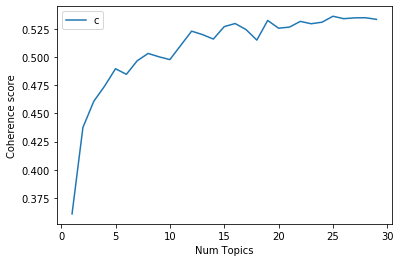

In [39]:
# Show graph
limit=30; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values1"), loc='best')
plt.show()

In [40]:
for i, j in zip(x,coherence_values):
    print(f'model {i} has a coherence value of {j:.3f}.')

model 1 has a coherence value of 0.361.
model 2 has a coherence value of 0.438.
model 3 has a coherence value of 0.461.
model 4 has a coherence value of 0.474.
model 5 has a coherence value of 0.490.
model 6 has a coherence value of 0.485.
model 7 has a coherence value of 0.497.
model 8 has a coherence value of 0.503.
model 9 has a coherence value of 0.500.
model 10 has a coherence value of 0.498.
model 11 has a coherence value of 0.511.
model 12 has a coherence value of 0.523.
model 13 has a coherence value of 0.520.
model 14 has a coherence value of 0.516.
model 15 has a coherence value of 0.527.
model 16 has a coherence value of 0.530.
model 17 has a coherence value of 0.525.
model 18 has a coherence value of 0.515.
model 19 has a coherence value of 0.533.
model 20 has a coherence value of 0.526.
model 21 has a coherence value of 0.527.
model 22 has a coherence value of 0.532.
model 23 has a coherence value of 0.530.
model 24 has a coherence value of 0.531.
model 25 has a coherence 

Topic Coherence is a measure used to evaluate topic models: it is applied to the top N words from the topic. It is defined as the average / median of the pairwise word-similarity scores of the words in the topic.

## Generate the topic dataframe

In [41]:
# Select the model and print the topics
optimal_model = model_list[21]
model_topics = optimal_model.show_topics(formatted=False)
pprint.pprint(optimal_model.print_topics(num_words=10))

[(5,
  '0.104*"bathroom" + 0.082*"closet" + 0.061*"bedroom" + 0.057*"space" + '
  '0.056*"small" + 0.051*"shower" + 0.048*"full" + 0.046*"large" + 0.045*"bed" '
  '+ 0.039*"desk"'),
 (21,
  '0.139*"restaurant" + 0.071*"shop" + 0.069*"store" + 0.062*"bar" + '
  '0.061*"distance" + 0.046*"phone" + 0.039*"block" + 0.039*"grocery" + '
  '0.036*"food" + 0.034*"market"'),
 (1,
  '0.141*"tv" + 0.056*"cable" + 0.051*"full" + 0.051*"internet" + 0.048*"flat" '
  '+ 0.041*"free" + 0.041*"high" + 0.039*"screen" + 0.029*"speed" + '
  '0.028*"kitchen"'),
 (7,
  '0.050*"home" + 0.046*"historic" + 0.043*"beautiful" + 0.033*"tree" + '
  '0.030*"french" + 0.024*"quarter" + 0.023*"original" + 0.022*"cottage" + '
  '0.022*"style" + 0.021*"property"'),
 (14,
  '0.111*"bus" + 0.091*"line" + 0.064*"easy" + 0.063*"minute" + 0.053*"public" '
  '+ 0.050*"close" + 0.048*"block" + 0.046*"station" + 0.043*"transportation" '
  '+ 0.040*"walk"'),
 (15,
  '0.233*"bed" + 0.102*"full" + 0.096*"size" + 0.041*"mattress" 

In [42]:
sent_topics_df = pd.DataFrame()
for i, row in enumerate(optimal_model[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # dominant topic
                wp = optimal_model.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)

In [43]:
sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
airbnb_dominant_topic = pd.concat([sent_topics_df, airbnb], axis=1)

# Show
airbnb_dominant_topic.head(2)

,Dominant_Topic,Perc_Contribution,Topic_Keywords,index,Unnamed: 0,access,accommodates,amenities,availability_30,availability_365,...,smart_location,space,square_feet,state,street,summary,transit,weekly_price,zipcode,0
0,20.0,0.0973,"parking, downtown, street, minute, mile, car, ...",0,1,I like for our guests to feel right at home! y...,12,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",16,305.0,...,"Nashville, TN",Beautiful brand new loft in a central location...,NaN,TN,"Nashville, TN, United States",Vacation in this Nashville home featuring a pr...,NaN,NaN,37203,0
1,13.0,0.0689,"quiet, neighborhood, clean, safe, friendly, ni...",1,2,NaN,1,{},30,365.0,...,"Los Angeles, CA",NaN,NaN,CA,"Silver Lake, Los Angeles, CA 90026, United States",If you are looking for a quiet home within the...,NaN,NaN,90026,1


In [62]:
len(airbnb_dominant_topic)

112178

In [44]:
topic=airbnb_dominant_topic[['Topic_Keywords',0]]
topic

,Topic_Keywords,0
0,"parking, downtown, street, minute, mile, car, ...",0
1,"quiet, neighborhood, clean, safe, friendly, ni...",1
2,"coffee, towel, linen, clean, maker, fresh, fre...",2
3,"guest, area, space, question, common, key, tim...",3
4,"bed, full, size, mattress, queen, bedroom, sle...",4
...,...,...
112173,"bed, full, size, mattress, queen, bedroom, sle...",112203
112174,"bathroom, closet, bedroom, space, small, showe...",112204
112175,"guest, area, space, question, common, key, tim...",112205
112176,"quiet, neighborhood, clean, safe, friendly, ni...",112206


In [45]:
train=topic[topic[0]<100000]
test=topic[topic[0]>=100000]

In [48]:
airbnb_train_des=pd.merge(airbnb_train_x,train,left_on=0,right_on=0,how='left')

In [50]:
airbnb_test_des=pd.merge(airbnb_test_x,test,left_on=0,right_on=0,how='left')
airbnb_test_des.head(20)

,Unnamed: 0,access,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,...,space,square_feet,state,street,summary,transit,weekly_price,zipcode,0,Topic_Keywords
0,1,Full access to driveway and backyard. Baseme...,6.0,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",5.0,171.0,22.0,46.0,1.0,Real Bed,...,"3 bedrooms. big spacious rooms, nice interior,...",NaN,NY,"Staten Island , NY, United States",- House for rent upstairs & off limits downsta...,Walking distance to transportation accessible ...,"$1,200.00",10305.0,100000,"bus, line, easy, minute, public, close, block,..."
1,2,NaN,2.0,"{Wifi,""Air conditioning"",Kitchen,""Free parking...",0.0,0.0,0.0,0.0,2.0,Real Bed,...,NaN,NaN,NY,"Brooklyn, NY, United States",Blocks away from Broadway Ave/ the JMZ subway ...,NaN,NaN,11221.0,100001,"restaurant, shop, store, bar, distance, phone,..."
2,3,NaN,2.0,"{Internet,Wifi,Kitchen,Doorman,Elevator,""Buzze...",6.0,265.0,14.0,14.0,2.0,Real Bed,...,The apartment is on the 11th floor of a 24-hou...,NaN,NY,"New York, NY, United States","Our bright & sunny 2-bedroom, 2-bath apartment...",The apartment is conveniently located within b...,NaN,10024.0,100002,"floor, light, window, lot, open, ceiling, larg..."
3,4,You can use our kitchen and we also have a was...,2.0,"{Internet,""Wireless Internet"",""Air conditionin...",6.0,8.0,6.0,8.0,1.0,Real Bed,...,"This is a big modern appartment, bedrooms are ...",NaN,CA,"Los Angeles, CA 90025, United States",We have a great place in a nice neighborhood i...,Yes you can get on the big blue bus or the ora...,NaN,90025.0,100003,"guest, area, space, question, common, key, tim..."
4,5,' Own private parking space on driveway or gar...,2.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",6.0,106.0,16.0,16.0,1.0,Real Bed,...,2 rooms Available : Monthly booking suggest 31...,NaN,CA,"Rosemead, CA 91770, United States",50% off for monthly discount Room (A) 40% ...,',NaN,91770.0,100004,"night, check, time, day, long, hour, term, boo..."
5,6,NaN,2.0,"{TV,Wifi,""Air conditioning"",Heating,""Family/ki...",2.0,22.0,6.0,22.0,1.0,Real Bed,...,This is a private guest suite located above a ...,NaN,LA,"New Orleans, LA, United States",This guest suite is located above Slice Pizzer...,Of course there's the streetcar... otherwise i...,NaN,70130.0,100005,"coffee, towel, linen, clean, maker, fresh, fre..."
6,7,Guests will have access to the entire apartmen...,5.0,"{TV,""Wireless Internet"",Kitchen,Heating,""Famil...",15.0,158.0,45.0,75.0,1.0,Real Bed,...,This apartment has beautiful period features a...,NaN,OR,"Portland, OR, United States",Comfortable and cute one bedroom apartment in ...,"Streetcar, MAX train, TriMet buses, and Biketo...",NaN,97201.0,100006,"apartment, train, building, block, subway, wal..."
7,8,NaN,1.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",7.0,313.0,8.0,38.0,1.0,Real Bed,...,"400 sq. ft., rustic, top unit studio on Little...",NaN,CA,"Hollywood Hills, Los Angeles, CA 90046, United...",Quaint and fun Laurel Canyon retreat.,Walking distance to Hollywood Blvd. and Sunset...,NaN,90046.0,100007,"bus, line, easy, minute, public, close, block,..."
8,9,Whole apartment.,4.0,"{TV,Wifi,""Air conditioning"",Kitchen,""Pets allo...",0.0,300.0,2.0,25.0,2.0,Real Bed,...,Features include private elevator opening dire...,NaN,NY,"New York, NY, United States",Breathtaking 5th Avenue Penthouse with two pri...,Walking distance to most neighborhoods. In Fl...,NaN,10010.0,100008,"view, beautiful, pool, amenity, deck, hot, ama..."
9,10,"Enjoy the courtyard, laundry facilities and On...",4.0,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",0.0,0.0,0.0,0.0,1.0,Real Bed,...,"With Queen bed & fold out futon, 1 full bath ...",NaN,TX,"West 35th Street, Austin, TX 78703, United States",Perfectly located for SXSW! If you prefer not...,Proximity to SBSW is ideal because its literal...,NaN,78703.0,100009,"quiet, neighborhood, clean, safe, friendly, ni..."


In [51]:
#airbnb_train_des.drop(['Unnamed: 0',0],axis=1,inplace=True)
airbnb_test_des.drop(['Unnamed: 0',0],axis=1,inplace=True)

In [52]:
#airbnb_train_des.to_csv('airbnb_train_des.csv')
airbnb_test_des.to_csv('airbnb_test_des.csv')